In [1]:
print('all ok')

all ok


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

import scipy.stats as stats

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer



In [2]:
df=pd.read_csv(r'../Datasets/titanic_train.csv',usecols=['Age','Fare','Survived'])

In [8]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [10]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_15944\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [11]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [12]:
x=df[['Age','Fare']]
y=df['Survived']

In [13]:
x.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=27)

In [22]:
import pylab
import statsmodels.api as sm

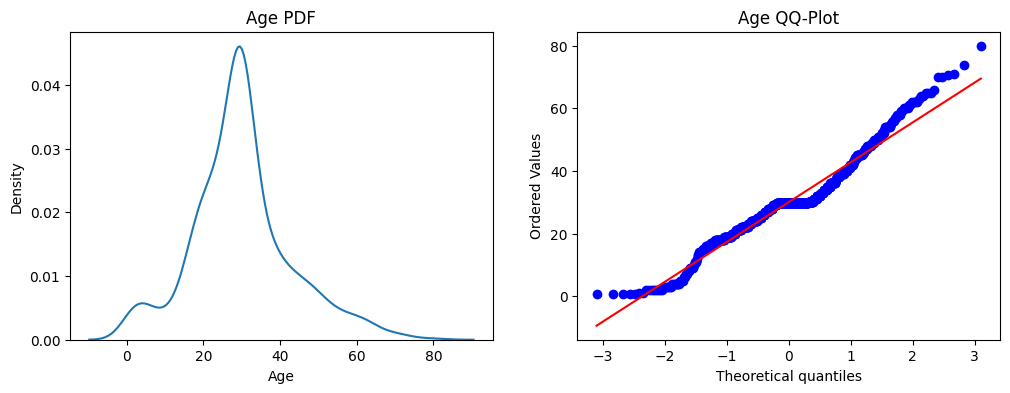

In [31]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,4))


sns.kdeplot(data=x_train,x='Age',ax=ax1)
ax1.set_title("Age PDF")


stats.probplot(x=x_train['Age'],dist='norm',plot=ax2)
ax2.set_title("Age QQ-Plot")

plt.show()

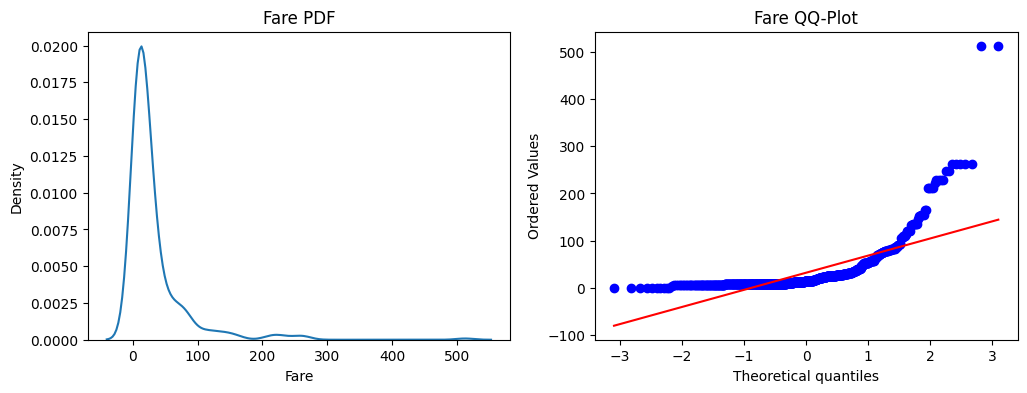

In [32]:

fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,4))


sns.kdeplot(data=x_train,x='Fare',ax=ax1)
ax1.set_title("Fare PDF")


stats.probplot(x=x_train['Fare'],dist='norm',plot=ax2)
ax2.set_title("Fare QQ-Plot")

plt.show()

In [33]:
model_dt=DecisionTreeClassifier()
model_lr=LogisticRegression()

In [35]:
model_dt.fit(x_train,y_train)
model_lr.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [36]:
y_pred_dt=model_dt.predict(x_test)
y_pred_lr=model_lr.predict(x_test)

In [37]:
print("Accuracy in DT:",accuracy_score(y_test,y_pred_dt))
print("Accuracy in LR:",accuracy_score(y_test,y_pred_lr))

Accuracy in DT: 0.6368715083798883
Accuracy in LR: 0.6312849162011173


In [38]:
log_trf=FunctionTransformer(func=np.log1p)

In [39]:
x_train_trans=log_trf.fit_transform(x_train)
x_test_trans=log_trf.transform(x_test)

In [40]:
model_dt.fit(x_train_trans,y_train)
model_lr.fit(x_train_trans,y_train)

y_pred_dt=model_dt.predict(x_test_trans)
y_pred_lr=model_lr.predict(x_test_trans)


print("Accuracy in DT with log transform:",accuracy_score(y_test,y_pred_dt))
print("Accuracy in LR with log transform:",accuracy_score(y_test,y_pred_lr))

Accuracy in DT with log transform: 0.6256983240223464
Accuracy in LR with log transform: 0.6927374301675978


In [41]:
print("Accuracy in DT with log transform and cv:",np.mean(cross_val_score(model_dt,x_train_trans,y_train,scoring='accuracy',cv=10)))
print("Accuracy in LR with log transform and cv:",np.mean(cross_val_score(model_lr,x_train_trans,y_train,scoring='accuracy',cv=10)))

Accuracy in DT with log transform and cv: 0.6320422535211268
Accuracy in LR with log transform and cv: 0.6757629107981221


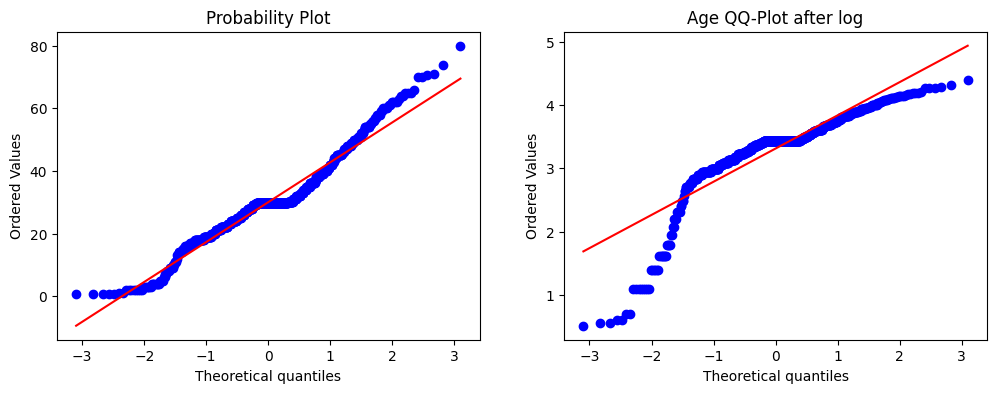

In [43]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,4))


stats.probplot(x=x_train['Age'],dist='norm',plot=ax1)
plt.title("Age QQ-Plot before log")


stats.probplot(x=x_train_trans['Age'],dist='norm',plot=ax2)
plt.title("Age QQ-Plot after log")

plt.show()

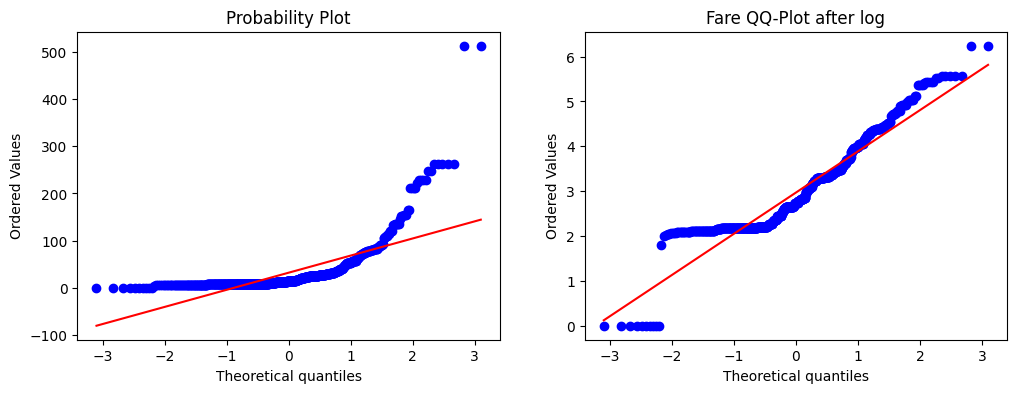

In [44]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,4))


stats.probplot(x=x_train['Fare'],dist='norm',plot=ax1)
plt.title("Fare QQ-Plot before log")


stats.probplot(x=x_train_trans['Fare'],dist='norm',plot=ax2)
plt.title("Fare QQ-Plot after log")

plt.show()

In [45]:
trf2_col=ColumnTransformer(
    transformers=[
        ('log',FunctionTransformer(np.log1p),['Fare'])
    ],remainder='passthrough'
)

In [46]:
x_train_transformed=trf2_col.fit_transform(x_train)
x_test_transformed=trf2_col.transform(x_test)

In [47]:
model_dt.fit(x_train_transformed,y_train)
model_lr.fit(x_train_transformed,y_train)

y_pred_dt=model_dt.predict(x_test_transformed)
y_pred_lr=model_lr.predict(x_test_transformed)


print("Accuracy in DT with log transform:",accuracy_score(y_test,y_pred_dt))
print("Accuracy in LR with log transform:",accuracy_score(y_test,y_pred_lr))

Accuracy in DT with log transform: 0.6256983240223464
Accuracy in LR with log transform: 0.6703910614525139


In [48]:
x_transformed=trf2_col.fit_transform(x)

In [50]:
print("Accuracy in DT with log transform and cv:",np.mean(cross_val_score(model_dt,x_transformed,y,scoring='accuracy',cv=10)))
print("Accuracy in LR with log transform and cv:",np.mean(cross_val_score(model_lr,x_transformed,y,scoring='accuracy',cv=10)))

Accuracy in DT with log transform and cv: 0.6577153558052433
Accuracy in LR with log transform and cv: 0.6712609238451936


In [61]:
def apply_transform(transform):
    trf_func=ColumnTransformer(transformers=[
        ('log',FunctionTransformer(transform),['Fare'])
        ],remainder='passthrough')
    
    x_trans=trf_func.fit_transform(x)
    model=LogisticRegression()

    print("Accoracy if LR:",np.mean(cross_val_score(model,x_trans,y,scoring='accuracy',cv=10)))

    fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,4))


    stats.probplot(x=x['Fare'],dist='norm',plot=ax1)
    plt.title("Fare QQ-Plot before log")


    stats.probplot(x=x_trans[:,0],dist='norm',plot=ax2)
    plt.title("Fare QQ-Plot after log")

    plt.show()


Accoracy if LR: 0.6712609238451936


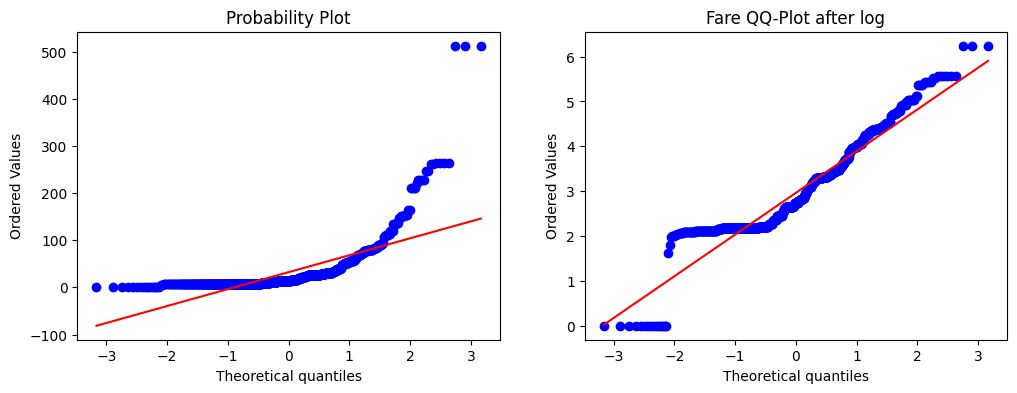

In [62]:
apply_transform(lambda x:np.log1p(x))

Accoracy if LR: 0.61729088639201


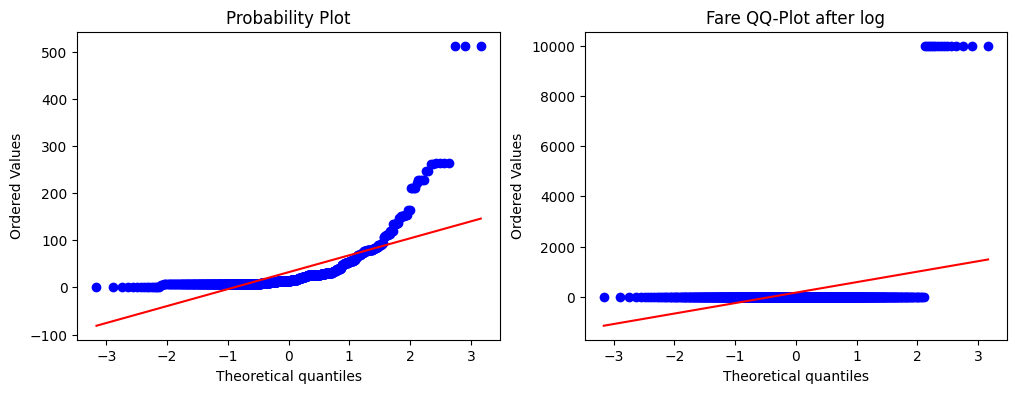

In [63]:
apply_transform(lambda x:1/(x+0.0001))

Accoracy if LR: 0.6431335830212235


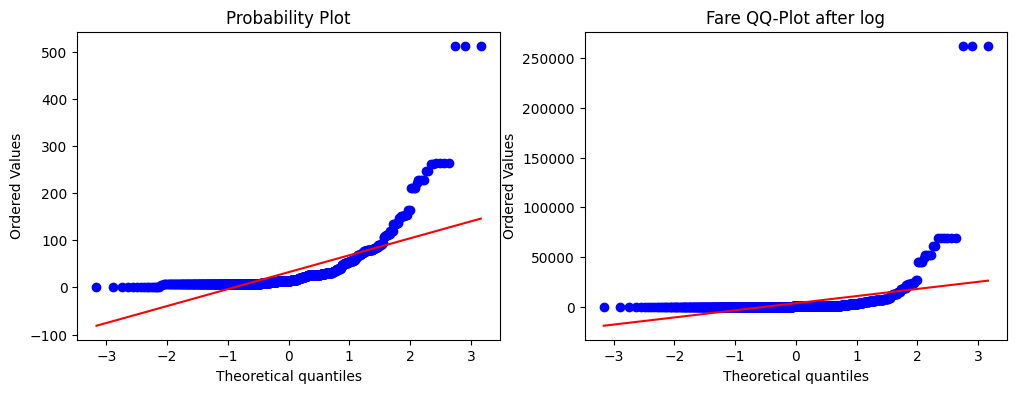

In [64]:
apply_transform(lambda x:x**2)